In [3]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *

In [21]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QJosephsonJunction('JJG'), ['GND', '6'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CG'), ['GND', '6'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie1 = QVariable('φe1')
phie2 = QVariable('φe2')
#phix2 = QVariable('φx2')
phix.create_grid(12, 1)
phiy.create_grid(12, 1)
phiz.create_grid(12, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie1)
FQ3JJ.add_variable(phie2)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6'], 
                       ['φx', 'φy', 'φz', 'φe1', 'φe2'], 
                       np.asarray([[0,0,0,0,0], [0,0,1,0,0], [1,0,0,-1,0], [1,0,0,0,0], [0,1,0,0,0], [1,0,0,1,0], [1,0,0,0,1]]))


alpha = 0.72
flux_steps = 100
energies = np.zeros((flux_steps,flux_steps,4), dtype=np.float)
#energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 150e9
Ec = 2*1.9e-19**2/3.5e-15/(2*np.pi*1.054e-34)

FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(2/Ec)
FQ3JJ.find_element('CB').set_capacitance(2/Ec)
FQ3JJ.find_element('CD').set_capacitance(2/Ec)
FQ3JJ.find_element('CE').set_capacitance(2/Ec)
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(2*alpha/Ec)

FQ3JJ.find_element('JJG').set_critical_current(Ej*20)
FQ3JJ.find_element('CG').set_capacitance(2*20/Ec)

phi_range = np.linspace(-2*np.pi, 2*np.pi, flux_steps)
for phie1_id, phie1_value in enumerate(phi_range):
    for phie2_id, phie2_value in enumerate(phi_range):
        phie1.set_parameter(phie1_value, 0)
        phie2.set_parameter(phie2_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
        energies[phie1_id, phie2_id, :] = eigenenergies
    #energies[phie_id, :] = eigenenergies
    print (phie1_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:64: ComplexWarning: Casting complex values to real discards the imaginary part


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [22]:
# Создаем двумерную матрицу-сетку
xgrid, ygrid = np.meshgrid(phi_range/np.pi/2,phi_range/np.pi/2)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid
zgrid1 = xgrid+ygrid
zgrid2 = xgrid+ygrid
zgrid3 = xgrid+ygrid
zgrid4 = xgrid+ygrid
zgrid5 = xgrid+ygrid

In [23]:
for i in arange (0, flux_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,0]
        zgrid1[j][i]=energies[i,j,1]
        zgrid2[j][i]=energies[i,j,1]-energies[i,j,0]
        zgrid3[j][i]=energies[i,j,2]
        zgrid4[j][i]=energies[i,j,3]
        zgrid5[j][i]=energies[i,j,2]-energies[i,j,1]

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

import numpy as np

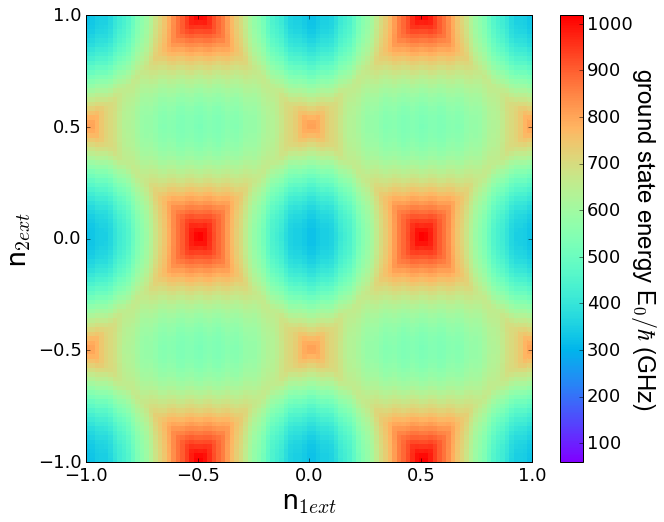

In [25]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 1, figsize=(10, 8))


p = axes.pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.rainbow,  vmin=60, vmax=zgrid0.max()/1e9)

axes.set_xlabel(r'n$_{1ext}$', fontsize=28, **hfont)
axes.set_ylabel(r'n$_{2ext}$', fontsize=28, **hfont)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)
axes.set_xticks(arange(-1, 1.1, 0.5));
#axes.set_xticks(arange(-1, 1.1, 0.5));
axes.axis('tight')
#axes.text(-0.9, 0.7,'(a)', fontsize=24, verticalalignment='center')

cb = fig.colorbar(p, ax=axes)
cb.set_label('ground state energy E$_{0}/\hbar$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

#colorbar().ax.tick_params(axis='y', direction='out')


#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/stability.pdf", bbox_inches="tight")

# Crossection

In [5]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

In [10]:
d2 = np.zeros(498)
Z_total = np.zeros(498)
S21_total = np.zeros(498)
for i in arange(1, 498, 1):
    d2[i] = 1/(zgrid0[2, 499-i]+zgrid0[0,497-i]-2*zgrid0[1, 498-i])
    #Z_total[i] = (d2[i]*10e9*1j) 
    #S21_total[i] = 20*np.log(2*50/(d2[i]*15+2*50))
    
Z_total[0]=Z_total[1]



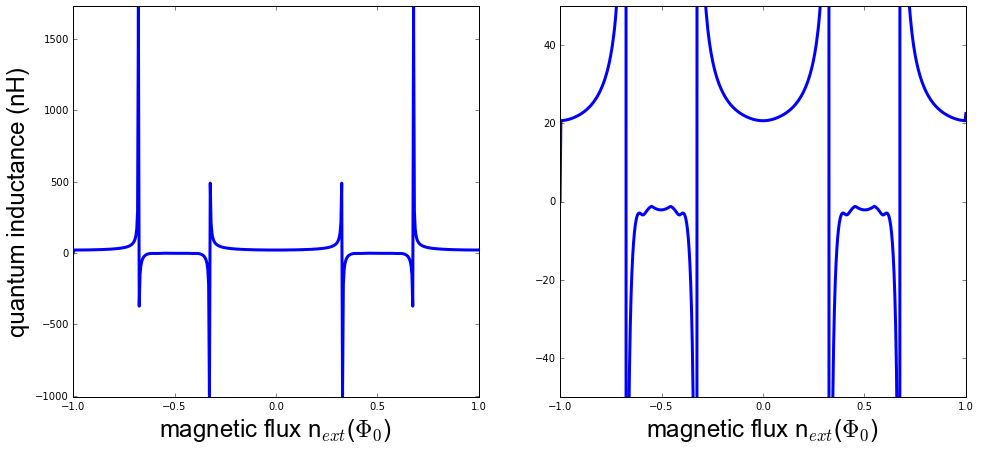

In [19]:
phi_range1 = np.linspace(-2*np.pi, 2*np.pi, 498)
    
#fig, axes = plt.subplots(figsize=(10, 8))
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].plot(phi_range1/2/np.pi,d2*1e9, linewidth=3.0)
axes[0].set_ylabel(r'quantum inductance (nH)', fontsize=24, **hfont)
axes[0].axis('tight')
axes[0].set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)

axes[1].plot(phi_range1/2/np.pi,d2*1e9, linewidth=3.0)
axes[1].set_ylim(-50,50)
axes[1].set_xlim(-1,1)
axes[1].set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)

plt.show()

#axes[1].plot(Z_total)
#axes[2].plot(S21_total)

plt.gcf().set_size_inches(16,7)
plt.savefig("C:/neon/quantum_inductance.pdf", bbox_inches="tight")

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


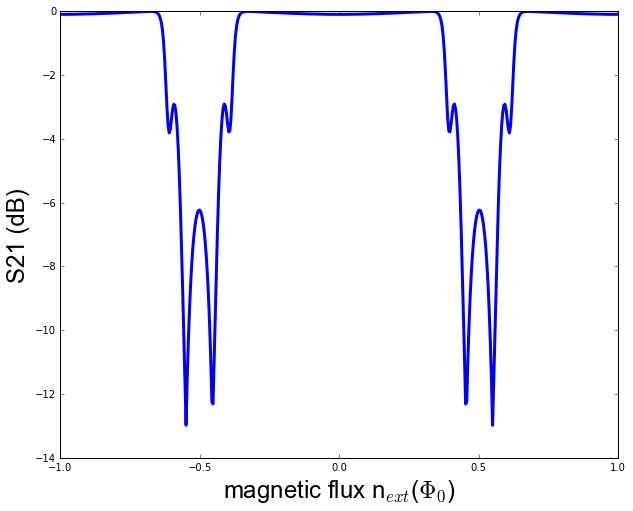

In [194]:
phi_range1 = np.linspace(-2*np.pi, 2*np.pi, 498)
    
fig, axes = plt.subplots(figsize=(10, 8))

#axes.plot(phi_range1/2/np.pi, 20*np.log(2*50/(d2*10e9*1j*15+2*50)), linewidth=3.0)
axes.plot(phi_range1/2/np.pi, 20*np.log(abs((-d2*10e9*1j*5)/(d2*10e9*1j*5+2*50))), linewidth=3.0)
#axes.set_ylim(-3,1)
#axes.set_xlim(-1,1)
axes.set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)
axes.set_ylabel(r'S21 (dB)', fontsize=24, **hfont)

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/15twnqubitss21.pdf", bbox_inches="tight")

In [40]:
induct_neg = -1e-10
induct_pos = 4.2e-9
#2.86e-9

In [56]:
qubits_number = 15

In [57]:
2*np.pi*induct_pos*10e9

263.89378290154264

In [58]:
2*np.pi*induct_neg*10e9

-6.283185307179587

In [59]:
20*np.log(abs((-2*np.pi*induct_pos*10e9*1j*qubits_number)/(2*np.pi*induct_pos*10e9*1j*qubits_number+2*50)))

-0.0063799990946210097

In [60]:
20*np.log(abs((-2*np.pi*induct_neg*10e9*1j*qubits_number)/(2*np.pi*induct_neg*10e9*1j*qubits_number+2*50)))

-7.5414393517781892

In [61]:
20*np.log(abs((-2*np.pi*induct_pos*10e9*1j*qubits_number)/(2*np.pi*induct_pos*10e9*1j*qubits_number+2*50))) - 20*np.log(abs((-2*np.pi*induct_neg*10e9*1j*qubits_number)/(2*np.pi*induct_neg*10e9*1j*qubits_number+2*50)))

7.5350593526835681

In [164]:
20*np.log(2*50/(d2[50]*10e9*1j*15+2*50)) - 20*np.log(2*50/(d2[100]*10e9*1j*15+2*50))

(12.872277913658577+21.406331892694993j)

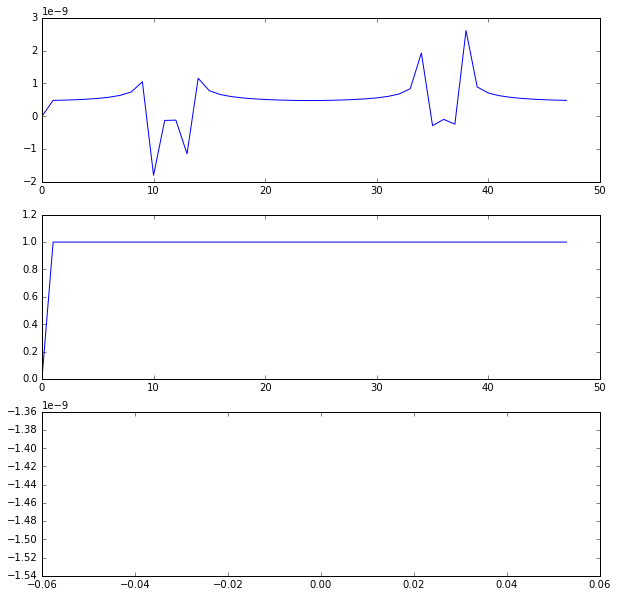

In [70]:
d2 = np.zeros(48)
Z_total = np.zeros(48)
S21_total = np.zeros(48)
for i in arange(1, 48, 1):
    d2[i] = 1/(zgrid0[2, 49-i]+zgrid0[0,47-i]-2*zgrid0[1, 48-i])
    Z_total[i] = 2*50/(d2[i]+2*50)
    S21_total = 20*np.log(2*50/(d2[i]*15+2*50))
    
    
    
fig, axes = plt.subplots(nrows=3,  figsize=(10, 10))

axes[0].plot(d2)

axes[1].plot(Z_total)
axes[2].plot(S21_total)

plt.show()


In [65]:
d2[25]

4.8143228384906142e-10

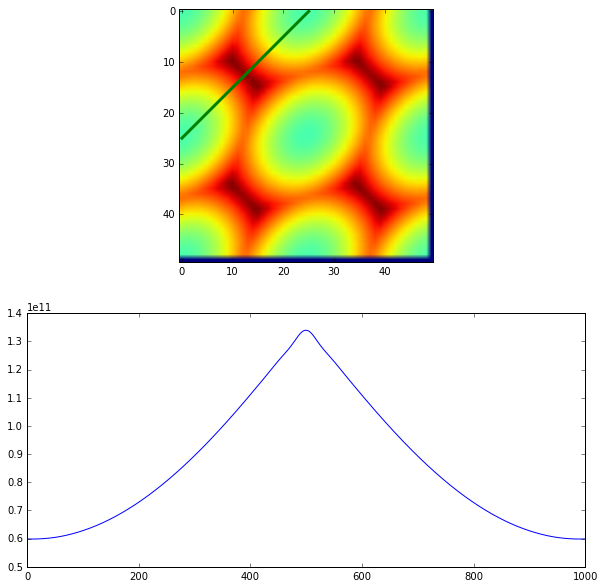

In [19]:
x0, y0 = 0, 25 # These are in _pixel_ coordinates!!
x1, y1 = 25, 0
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].imshow(zgrid0)
axes[0].plot([x0, x1], [y0, y1], 'g', linewidth=3.0)
axes[0].axis('image')

axes[1].plot(zi)

plt.show()


# Производная

In [20]:
first_derivative = np.gradient(zi)
second_derivative = np.gradient(first_derivative)

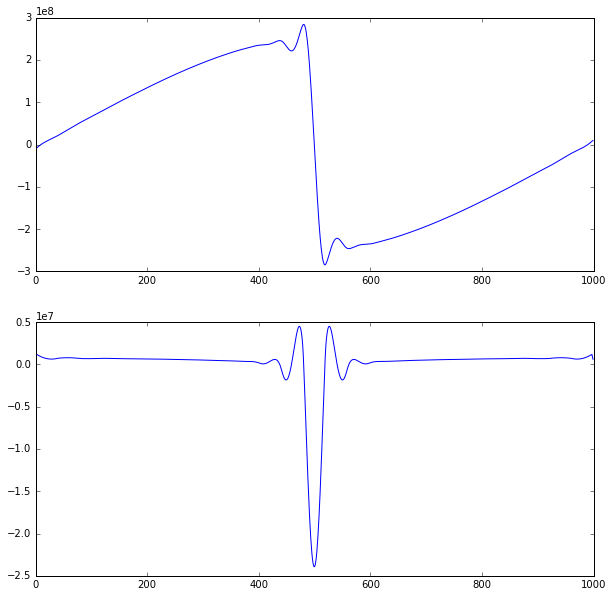

In [21]:
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].plot(first_derivative)
axes[1].plot(second_derivative)
plt.show()

# Measure L from curvature 

In [66]:
Induct = []
Z_total = []
S21_total = []

num = 1000
for i in arange (20, 80, 1):
    x0, y0 = 0, i 
    x1, y1 = i, 0
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))
    
    first_derivative = np.gradient(zi)
    second_derivative = np.gradient(first_derivative)
    
    Induct.append(1/second_derivative[500])
    Z_total.append(2*50/(second_derivative[500]*10e9+2*50))
    S21_total.append(20*np.log(2*50/(second_derivative[500]*10e9+2*50)*15))

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in log


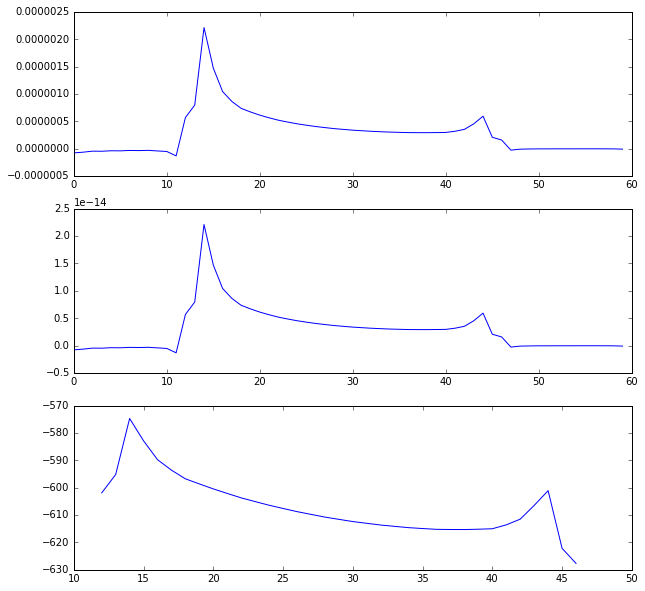

In [67]:
#-- Plot...
fig, axes = plt.subplots(nrows=3,  figsize=(10, 10))

axes[0].plot(Induct)

axes[1].plot(Z_total)
axes[2].plot(S21_total)

plt.show()


In [53]:
Z_total

[-7.8939895844444977e-16,
 -6.6229979798760249e-16,
 -4.7640160997755909e-16,
 -4.9151124524719543e-16,
 -4.0085479082442909e-16,
 -4.1808053984264506e-16,
 -3.4127181449693151e-16,
 -3.703876452376207e-16,
 -3.2635164493204867e-16,
 -4.3447924260997761e-16,
 -5.3622195060305962e-16,
 -1.3344833566549072e-15,
 5.680760351762191e-15,
 7.9434774341979713e-15,
 2.2117364951768759e-14,
 1.4700992925343237e-14,
 1.0419411556498939e-14,
 8.6024120727830844e-15,
 7.3421041043823148e-15,
 6.6891356690776438e-15,
 6.1069608879861462e-15,
 5.6203847559262023e-15,
 5.1845151940327865e-15,
 4.8425655590755869e-15,
 4.5297209675981335e-15,
 4.2715031178169792e-15,
 4.031678993897549e-15,
 3.8336751537751803e-15,
 3.647652495955176e-15,
 3.5009663996014438e-15,
 3.3617271005231927e-15,
 3.2558974915926853e-15,
 3.1550839605474967e-15,
 3.0793158413219274e-15,
 3.0075778037899779e-15,
 2.9599666151043601e-15,
 2.9166583298934622e-15,
 2.9078848777847927e-15,
 2.9048456690558398e-15,
 2.92280949737624

In [202]:
1/second_derivative[500]

-1.3103957841211111e-07

# Цикличное вычисление индуктивности

In [242]:
num = 1000
inductivity = []

for i in arange(1,1000,1):
    x0, y0 = i, 0            # These are in _pixel_ coordinates!!
    x1, y1 = 0, i
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)   
    zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))   # Extract the values along the line, using cubic interpolation
    first_derivative = np.gradient(zi)
    second_derivative = np.gradient(first_derivative)
    inductivity.append(1/second_derivative[500])

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars


In [243]:
impedance = inductivity[50]*10e9

In [244]:
impedance 

35188.42187520118

In [245]:
S21 = 2*50/(impedance +2*50)

In [246]:
S21

0.0028337906510428187

# Tunable alpha

In [2]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(24, 1)
phiy.create_grid(24, 1)
phiz.create_grid(24, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

In [3]:
alpha_steps = 50
flux_steps = 64

alpha_range = np.linspace (0.01, 1, alpha_steps)
alpha_id = np.linspace(1,alpha_steps, alpha_steps)

phi_range = np.linspace(0*np.pi/2, 2*np.pi/2, flux_steps)
phi_id = np.linspace(1,flux_steps,flux_steps)
#phi_range = np.linspace(-3*np.pi/2, 3*np.pi/2, flux_steps)
#phi_range = np.linspace(-13*np.pi/2, 13*np.pi/2, flux_steps)



energies = np.zeros((flux_steps,10), dtype=np.float)
energies_alpha = np.zeros((alpha_steps,flux_steps,10), dtype=np.float)

In [4]:
Ej = 120e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(2/Ec)
FQ3JJ.find_element('CB').set_capacitance(2/Ec)
FQ3JJ.find_element('CD').set_capacitance(2/Ec)
FQ3JJ.find_element('CE').set_capacitance(2/Ec)

for i in alpha_id:
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha_range[i-1])
    FQ3JJ.find_element('CC').set_capacitance(2*alpha_range[i-1]/Ec)
    
    for phie_id, phie_value in enumerate(phi_range):
        phie.set_parameter(phie_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=10)
        energies_alpha[i-1, phie_id, :] = eigenenergies
    print i

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


In [5]:
PHI_r, ALP_r = np.meshgrid(phi_range, alpha_range)
PHI_id, ALP_id = np.meshgrid(phi_id, alpha_id)

In [6]:
U =  np.zeros((alpha_steps,flux_steps), dtype=np.float)

for i in alpha_id:
    for j in phi_id:
        U[i-1][j-1] = ((energies_alpha[i-1,j-1,2]-energies_alpha[i-1,j-1,1])-(energies_alpha[i-1,j-1,1]-energies_alpha[i-1,j-1,0]))/(energies_alpha[i-1,j-1,1]-energies_alpha[i-1,j-1,0])
        print i , j

1.0 1.0
1.0 2.0
1.0 3.0
1.0 4.0
1.0 5.0
1.0 6.0
1.0 7.0
1.0 8.0
1.0 9.0
1.0 10.0
1.0 11.0
1.0 12.0
1.0 13.0
1.0 14.0
1.0 15.0
1.0 16.0
1.0 17.0
1.0 18.0
1.0 19.0
1.0 20.0
1.0 21.0
1.0 22.0
1.0 23.0
1.0 24.0
1.0 25.0
1.0 26.0
1.0 27.0
1.0 28.0
1.0 29.0
1.0 30.0
1.0 31.0
1.0 32.0
1.0 33.0
1.0 34.0
1.0 35.0
1.0 36.0
1.0 37.0
1.0 38.0
1.0 39.0
1.0 40.0
1.0 41.0
1.0 42.0
1.0 43.0
1.0 44.0
1.0 45.0
1.0 46.0
1.0 47.0
1.0 48.0
1.0 49.0
1.0 50.0
1.0 51.0
1.0 52.0
1.0 53.0
1.0 54.0
1.0 55.0
1.0 56.0
1.0 57.0
1.0 58.0
1.0 59.0
1.0 60.0
1.0 61.0
1.0 62.0
1.0 63.0
1.0 64.0
2.0 1.0
2.0 2.0
2.0 3.0
2.0 4.0
2.0 5.0
2.0 6.0
2.0 7.0
2.0 8.0
2.0 9.0
2.0 10.0
2.0 11.0
2.0 12.0
2.0 13.0
2.0 14.0
2.0 15.0
2.0 16.0
2.0 17.0
2.0 18.0
2.0 19.0
2.0 20.0
2.0 21.0
2.0 22.0
2.0 23.0
2.0 24.0
2.0 25.0
2.0 26.0
2.0 27.0
2.0 28.0
2.0 29.0
2.0 30.0
2.0 31.0
2.0 32.0
2.0 33.0
2.0 34.0
2.0 35.0
2.0 36.0
2.0 37.0
2.0 38.0
2.0 39.0
2.0 40.0
2.0 41.0
2.0 42.0
2.0 43.0
2.0 44.0
2.0 45.0
2.0 46.0
2.0 47.0
2.0 48.0
2.0 49.0
2

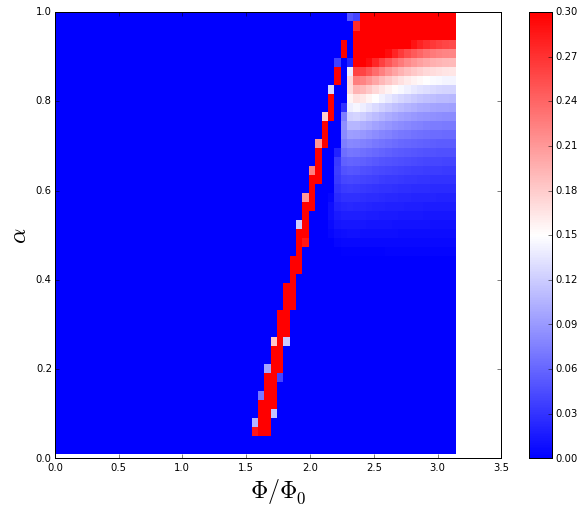

In [16]:
fig, axes = plt.subplots(figsize=(10, 8))

# original
#Z = np.real(U)
p = axes.pcolor(PHI_r, ALP_r, U, cmap=cm.bwr, vmin=0, vmax=0.3)
axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'$\alpha$', fontsize=24)

#axes.set_ylim((0, 1))

cb = fig.colorbar(p, ax=axes)

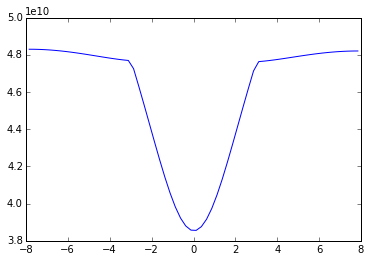

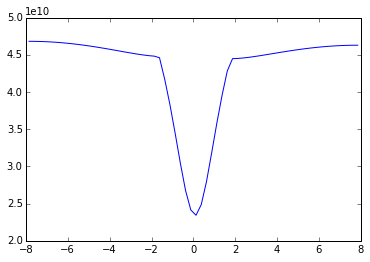

In [9]:
plt.figure (0)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,1]-energies_alpha[0,:,0])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,2]-energies_alpha[0,:,1])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,3]-energies_alpha[0,:,2])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,4]-energies_alpha[0,:,3])

plt.figure (1)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,1]-energies_alpha[1,:,0])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,2]-energies_alpha[1,:,1])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,3]-energies_alpha[1,:,2])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,4]-energies_alpha[1,:,3])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,5]-energies_alpha[1,:,4])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,6]-energies_alpha[1,:,5])

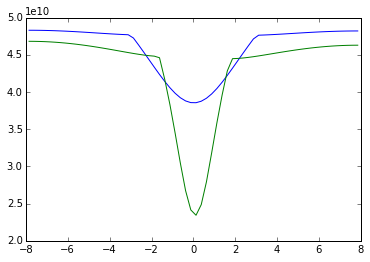

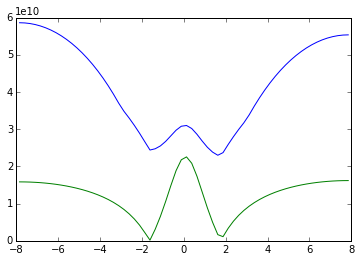

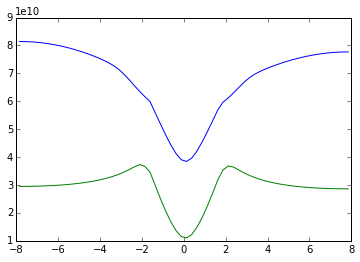

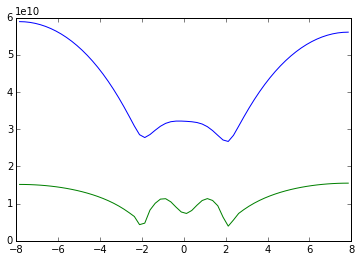

In [10]:
plt.figure (0)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,1]-energies_alpha[0,:,0])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,1]-energies_alpha[1,:,0])

plt.figure (1)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,2]-energies_alpha[1,:,1])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,2]-energies_alpha[1,:,1])

plt.figure (2)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,3]-energies_alpha[1,:,2])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,3]-energies_alpha[1,:,2])


plt.figure (3)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,4]-energies_alpha[1,:,3])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,4]-energies_alpha[1,:,3])

In [11]:
nomerr=20
anharm50 = ((energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])-(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0]))/(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0])
nomerr=0
anharm5 = ((energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])-(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0]))/(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0])

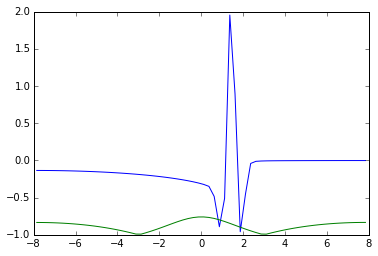

In [12]:
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm50)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm5)

In [26]:
nomerr=1
anharm20 = ((energies_alpha[nomerr,:,3]-energies_alpha[nomerr,:,2])-(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1]))/(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])
nomerr=0
anharm2 = ((energies_alpha[nomerr,:,3]-energies_alpha[nomerr,:,2])-(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1]))/(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])

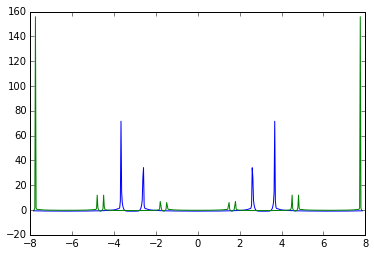

In [27]:
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm20)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm2)

In [71]:
Ej = 84e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)

In [75]:
Ec

21804529205.379208

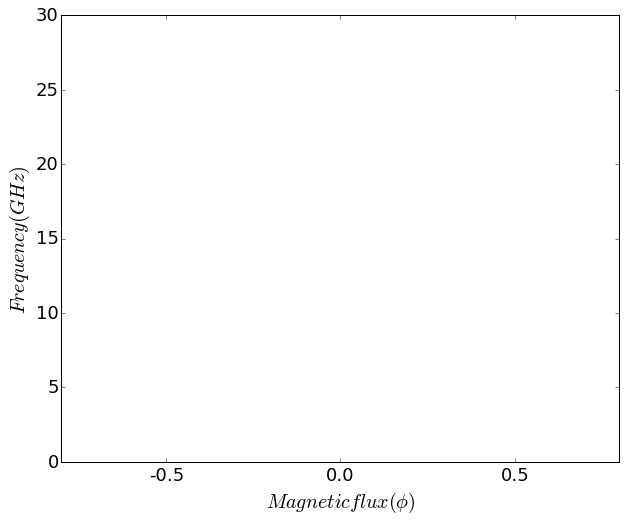

In [28]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.set_xlim([-0.8, 0.8])
axes.set_ylim([0, 30])

p2 = axes.plot(phi_range/(2*np.pi), (energies[:,1]-energies[:,0])/1e9,'r')
#p2 = axes.plot(phi_range/(2*np.pi), (energies[:,2]-energies[:,1])/1e9,'g')
#p2 = axes.plot(phi_range/(2*np.pi), (energies[:,3]-energies[:,2])/1e9,'b')
#p2 = axes.plot(phi_range/(2*np.pi), (-(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]))/1e9,'r')
#p2 = axes.plot(phi_range/(2*np.pi), (-(energies[:,2]-energies[:,1])+(energies[:,3]-energies[:,2]))/1e9,'r')

axes.set_xlabel(r'$Magnetic flux (\phi)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

new_tick_locations = np.array([-.50, 0, .50])

new_tick_labels = np.array([-0.5, 0, 0.5])
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

axes.set_xticks(new_tick_locations)
axes.set_xticklabels(new_tick_labels)

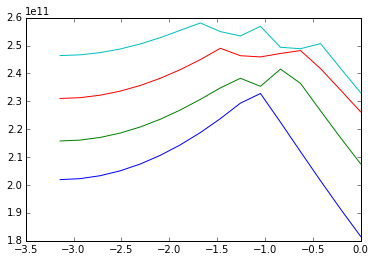

In [71]:
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies)

In [36]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(24, 1)
phiy.create_grid(24, 1)
phiz.create_grid(24, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

#EjEc_ratio = 80
alpha = 0.72
#flux_steps = 3
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
Ej_steps = 21
energies = np.zeros((Ej_steps,4), dtype=np.float)
Ej_range = np.logspace(9, 11, Ej_steps)

#for phie_id, phie_value in enumerate(np.linspace(-np.pi, np.pi, flux_steps)):
for Ej_id, Ej in enumerate(Ej_range):
    #Ej = 25e9
    phie_value = np.pi
    Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
    FQ3JJ.find_element('JJA').set_critical_current(Ej)
    FQ3JJ.find_element('JJB').set_critical_current(Ej)
    FQ3JJ.find_element('JJD').set_critical_current(Ej)
    FQ3JJ.find_element('JJE').set_critical_current(Ej)
    FQ3JJ.find_element('CA').set_capacitance(2/Ec)
    FQ3JJ.find_element('CB').set_capacitance(2/Ec)
    FQ3JJ.find_element('CD').set_capacitance(2/Ec)
    FQ3JJ.find_element('CE').set_capacitance(2/Ec)
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
    FQ3JJ.find_element('CC').set_capacitance(2*alpha/Ec)
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[Ej_id, :] = eigenenergies
    print('Ej_id: {0}, gap: {1:5.4g}'.format(Ej_id, eigenenergies[1]-eigenenergies[0]))

Ej_id: 0, gap: 1.087e+10+5.495e-05j


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:63: ComplexWarning: Casting complex values to real discards the imaginary part


KeyboardInterrupt: 

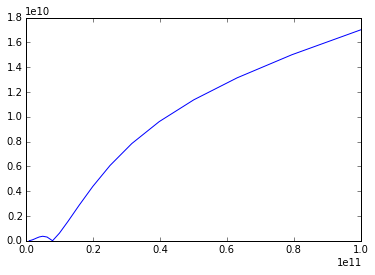

In [26]:
plt.plot(Ej_range, energies[:,1]-energies[:,0])

In [5]:
fo = open("fitting.grd-tab", "r+")
data=fo.read().split()
s21 = []
for y in range(1, 200001,1):
    s21.append(double(data[3*y-1]))
currents = np.arange (-10000e-6, 10000e-6, 80e-6)  #250
frequency = np.arange (6e9, 14e9, 1e7)  #800
s21 = np.reshape(s21, (800,250))

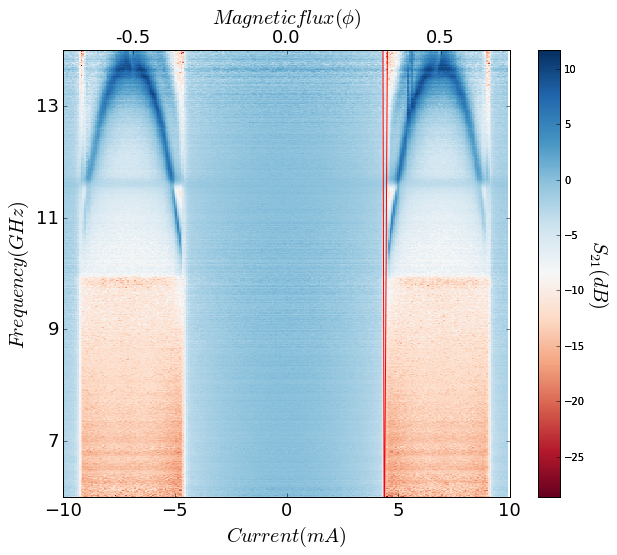

In [23]:
fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim([-10, 10])
axes.set_ylim([6, 14])

p = axes.pcolor(currents*1e3, frequency/1e9, s21, cmap=cm.RdBu)
p2 = ax2.plot(phi_range/(2*np.pi), (energies[:,1]-energies[:,0])/1e9,'r')

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'$Current (mA)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

plt.yticks(range(7, 15, 2));

new_tick_locations = np.array([-.50, 0, .50])
ax2.set_xlim(np.asarray([-0.5,0.5])/0.69)
new_tick_labels = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)


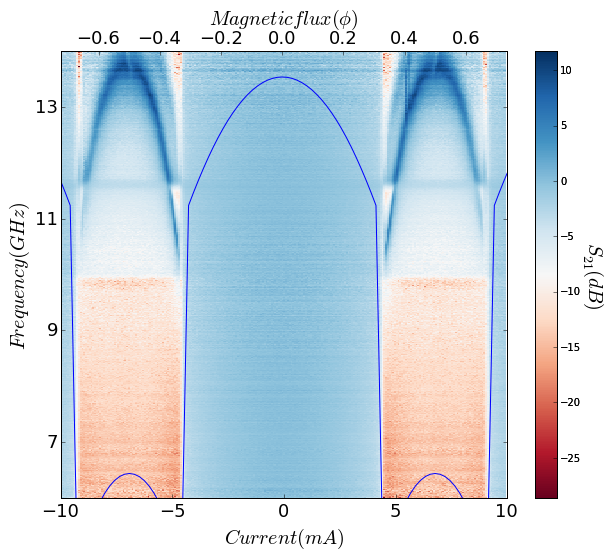

In [30]:
catsears = energies[:,1]-energies[:,0]
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])

fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim([-10, 10])
axes.set_ylim([6, 14])

phi_range_big = np.linspace(-4*np.pi, 4*np.pi, len(catsears))
p = axes.pcolor(currents*1e3, frequency/1e9, s21, cmap=cm.RdBu)
p2 = ax2.plot(phi_range_big/(2*np.pi), catsears/1e9)

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'$Current (mA)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

plt.yticks(range(7, 15, 2));

#new_tick_locations = np.array([.15, .5, .85])
ax2.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
#new_tick_labels = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)